In [11]:
import os
from tshistory.api import timeseries
from datetime import datetime as dt
from datagenic_rest_client.datagenic import DataGenic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')
datagenic_rest_server = "http://lon-qdev-ap11"

dg = DataGenic(
    url_rest_wrapper=datagenic_rest_server, datagenic_url=os.environ["datagenicserver"],
  datagenic_username=os.environ["datagenicusername"], datagenic_password=os.environ["datagenicpassword"])

In [2]:
EU = tsa.get("crude.petroineos.europe.net_length.kbd.monthly")
US = tsa.get("crude.petroineos.north_america.net_length.kbd.monthly")
diff = EU - US

In [27]:
arb_m1 = dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M01", from_date=dt(2010,1,1), to_date=dt.today())
arb_m2 =  dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M02", from_date=dt(2010,1,1), to_date=dt.today())
arb_m3 =  dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M03", from_date=dt(2010,1,1), to_date=dt.today())
arb_m1_m = dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M01", from_date=dt(2010,1,1), to_date=dt.today()).resample('MS').mean()
arb_m2_m =  dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M02", from_date=dt(2010,1,1), to_date=dt.today()).resample('MS').mean()
arb_m3_m =  dg.get_time_series("model://ICE_BRT_WTI_SP/EU.OIL.NSEA_WTI.ICE.BRENT_WTI.FUT.SP.M03", from_date=dt(2010,1,1), to_date=dt.today()).resample('MS').mean()
box_m = arb_m1_m - arb_m2_m
box_m_2 = arb_m2_m - arb_m3_m

<AxesSubplot:xlabel='Time'>

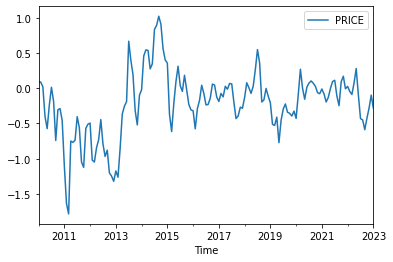

In [28]:
box_m_2.plot()

In [29]:
fig, ax = plt.subplots()
box_m_2.shift(5).tail(100).plot(ax=ax)
ax2 = ax.twinx()
diff.tail(100).plot(ax=ax2, color='maroon')
ax.set_title(label='inventories')
ax.legend(['Arb', 'diff'])

In [30]:
data = pd.concat([box_m, diff], axis=1)
data.columns = ['box', 'diff']
sns.regplot(data=data.loc['2019':], x='diff', y='box')

<AxesSubplot:xlabel='diff', ylabel='box'>